### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable is which test they receive (congruent or incongruent). The dependent variable is how much time they took to complete each list of words.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The null hypothesis is that there is no difference in speed between the two tests. Mathmatically speaking this would be represented by $H_0: \mu_C = \mu_I$ where $\mu_C$ is the average time the congruent test is completed in for the populationg and $\mu_I$ is the average time the incongruent test is completed in. They alternative hypothesis is that there is a statistically significant difference. This is, mathematically, $H_1:\mu_C \neq \mu_I$. Because we only have a sample, I will use bootstrapping to estimate the population means.

Since we are know the sample means (post-bootstrapping) will be normally distributed, we can use a two-sided, paired t-test to evaluate our null hypothesis. We use a dependent test because we are comparing two results by the same individual, not seperte populations. Then, depending on our results we may decide to refine our null and alternative hypotheses and see if we can reach a more meaningful conclusion.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


We can see from the above table that the mean time for the congruent test is 14.05 seconds and the mean time for the incongruent test is 22.02 seconds. Furthermore, the standard deviation for the congruent test is 3.56 seconds and for the incongruent test it is 4.80 seconds. From this data the congruent test appears to be completed quicker, on average, than the incongruent test, at least for this sample.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

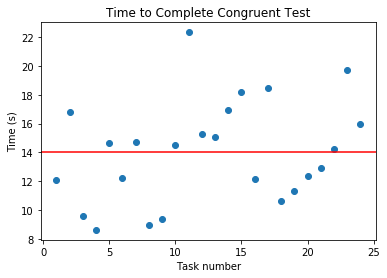

In [4]:
# Build the visualizations here
plt.scatter(range(1, df.shape[0] + 1), df['Congruent']);
plt.axhline(df['Congruent'].mean(), color='r');
plt.xlabel('Task number');
plt.ylabel('Time (s)');
plt.title('Time to Complete Congruent Test');

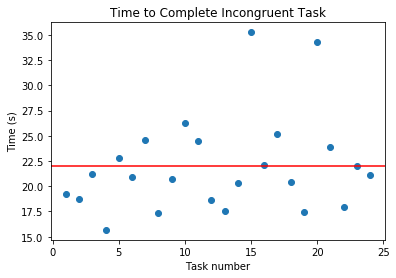

In [5]:
plt.scatter(range(1, df.shape[0] + 1), df['Incongruent']);
plt.axhline(df['Incongruent'].mean(), color='r');
plt.xlabel('Task number');
plt.ylabel('Time (s)');
plt.title('Time to Complete Incongruent Task');

We can see from above that the congruent task seems much less clustered around the sample mean, though the incongruent data has two significant outliers that are most likely responsible for its higher standard deviation. Neither appears to be super close to the normal distribution, but with a sample size of 25 it is hard to say what the population would look like.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [6]:
# Perform the statistical test here
# First we will bootstrap out data to create an array of sample means.
diffs = []
conmeans = []
inconmeans = []
for _ in range(10000):
    congruent_mean = df['Congruent'].sample(df['Congruent'].shape[0], replace=True).mean()
    incongruent_mean = df['Incongruent'].sample(df['Incongruent'].shape[0], replace=True).mean()
    diff = (congruent_mean - incongruent_mean)
    conmeans.append(congruent_mean)
    inconmeans.append(incongruent_mean)
    diffs.append(diff)

diffs = np.asarray(diffs)
conmeans = np.asarray(conmeans)
inconmeans = np.asarray(inconmeans)

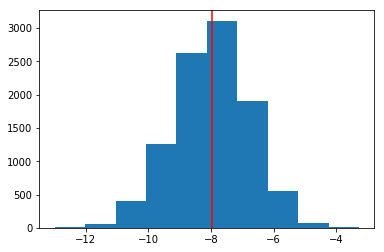

In [7]:
# Now let's plot the data to confirm it looks normal
obs_diff = df['Congruent'].mean() - df['Incongruent'].mean()
plt.hist(diffs);
plt.axvline(obs_diff, color='r');

In [8]:
#Calculate a 95% confidence interval
confintv = ((np.percentile(diffs, 2.5)), (np.percentile(diffs, 97.5)))
confintv

(-10.461785416666672, -5.6964302083333322)

From the above calculation we can say that we are 95% confident that the difference in means ($\mu_C - \mu_I$) is between **-10.33** and **-5.65**. This deals a big blow to our null hypothesis that $\mu_C - \mu_I = 0$.

In [9]:
#Now let't run a t-test on our dataset. This must be a paired t-test
t_stat, p_value = stats.ttest_rel(df['Congruent'], df['Incongruent'])
t_stat, p_value


(-8.020706944109957, 4.1030005857111781e-08)

As you can see from the above analysis we reject the null hypothesis that $\mu_C - \mu_I = 0$ in favor of the alternative hypothesis that $\mu_C - \mu_I \neq 0$. This is shown two ways. First our 95% confidence interval does not include our null hypothosis's value. Second, our t-test produced a p-value of 4e-8, so low that it all but confirms a significant difference between the tests. Furthermore, from the negative t-value and from our confidence interval we can pose a new alternative hypothesis that, on average, the congruent test is completed in less time than the incongruent one. Mathematically, $H_0: \mu_C - \mu_I \geq 0$ and $H_1: \mu_C - \mu_I \lt 0$.

We can now calculate what the distribution of differences should be under the smallest value of the null (0) and compare observed difference to find a new p-value.

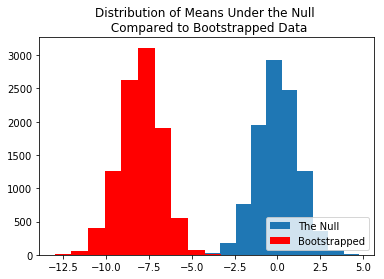

In [10]:
#Compute the p-value for our new null
nullmeans = np.random.normal(0,np.std(diffs),10000)

plt.hist(nullmeans, label='The Null');
plt.hist(diffs, color='r', label='Bootstrapped');
plt.title('Distribution of Means Under the Null \n Compared to Bootstrapped Data')
plt.legend(loc=4);

We can see from the above graph that there is barely any overlap between the two distributions. We can then expect a very small p-value.

In [11]:
p_value2 = (obs_diff > nullmeans).mean()
p_value2

0.0

Unsurprisingly, we still produce a very small p-value. Once again we reject the null hypothesis that $\mu_C - \mu_I \geq 0$ in favor of the alternative that $\mu_c - \mu_I \lt 0$. We can now say that, on average, an individual in the popultion will take longer time to complete the incongruent test than they would to complete the congruent one.